In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [6]:
#데이터 불러오기
x, y = make_blobs(random_state=1)

In [7]:
#KMeans 모델 학습
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [8]:
#군집 확인
print(kmeans.predict(x))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


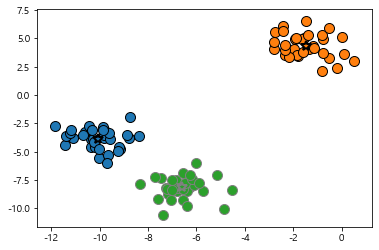

In [9]:
#시각화
mglearn.discrete_scatter(x[:,0],x[:,1], kmeans.labels_, markers='o')
#중심점 시각화
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], [0,1,2],
                         markers='*', markeredgewidth=2)
plt.show()

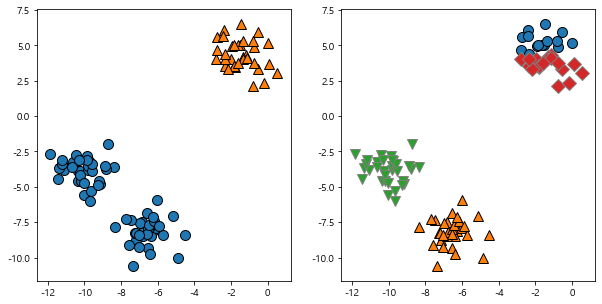

In [10]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

# 2개
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
a= kmeans.labels_

mglearn.discrete_scatter(x[:,0],x[:,1], a, ax=axes[0])

#4개
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
a= kmeans.labels_

mglearn.discrete_scatter(x[:,0],x[:,1], a, ax=axes[1])

plt.show()

## K-means 실패 사례

In [11]:
x, y = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x)

pred= kmeans.predict(x)

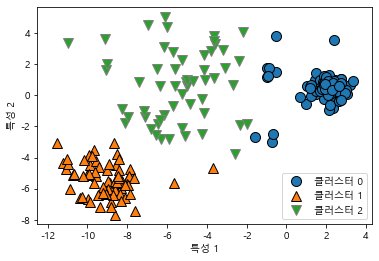

In [13]:
mglearn.discrete_scatter(x[:,0],x[:,1], pred)
plt.legend(['클러스터 0','클러스터 1','클러스터 2'], loc='best')
plt.xlabel('특성 1')
plt.ylabel('특성 2')
plt.show()

### 실패사례 2

In [14]:
x, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

#데이터가 길게 늘어지도록 변경
transfromation = rng.normal(size=(2,2))
x = np.dot(x, transfromation)

In [15]:
# Kmeans 학습, 예측
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

pred = kmeans.predict(x)

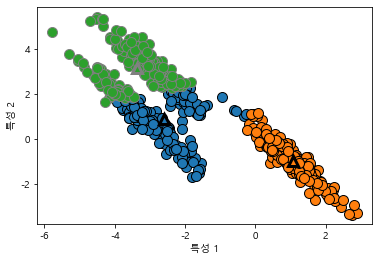

In [16]:
mglearn.discrete_scatter(x[:,0],x[:,1], kmeans.labels_, markers= 'o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2]
                         , markers='^', markeredgewidth=3)
plt.xlabel('특성 1')
plt.ylabel('특성 2')
plt.show()


#### 실패사례3

In [17]:
from sklearn.datasets import make_moons

In [18]:
x,y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [19]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
pred = kmeans.predict(x)

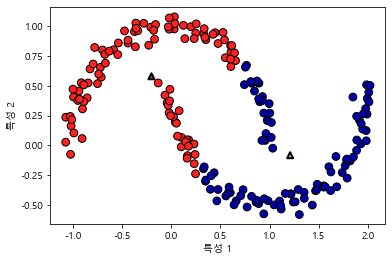

In [21]:
plt.scatter(x[:,0],x[:,1], c=pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            marker='^', c=range(kmeans.n_clusters), linewidths=2, 
            cmap='Paired', edgecolors='k')
plt.xlabel('특성 1')
plt.ylabel('특성 2')
plt.show()